In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:
year = 2012  
month = 7

# generate the data file path
datapath = os.path.join('.','data', f'{year}-{month:02}-power-survey-london.csv')

data = pd.read_csv(datapath)

In [17]:
data.head()


,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-07-01 00:00:00,21.281,1.229,9.511,37.568,149.347,67.261,12.791,32.020,2.277,...,58,81,55,69,599,23,3368,478.590,0.142099,0.177092
1,2012-07-01 00:30:00,18.722,0.968,7.804,31.962,148.770,62.054,10.789,31.575,2.256,...,58,81,55,71,597,23,3369,480.447,0.142608,0.214239
2,2012-07-01 01:00:00,17.238,0.880,7.187,30.977,134.489,56.691,9.942,29.536,2.063,...,58,81,55,71,597,23,3369,434.089,0.128848,0.190269
3,2012-07-01 01:30:00,15.889,0.895,6.942,31.407,117.296,52.265,10.522,26.220,2.052,...,58,81,55,71,597,23,3369,392.503,0.116504,0.160527
4,2012-07-01 02:00:00,15.115,1.531,6.890,31.069,107.810,48.240,10.225,25.614,2.109,...,58,81,55,71,597,23,3369,368.343,0.109333,0.138210


In [19]:
from datetime import datetime

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

data['day'] = data.apply(dayCalc, axis = 1)
data['tstamp'] = data.apply(tstampCalc, axis = 1)


In [24]:
data.head()


,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
0,2012-07-01 00:00:00,21.281,1.229,9.511,37.568,149.347,67.261,12.791,32.020,2.277,...,55,69,599,23,3368,478.590,0.142099,0.177092,1,0:00
1,2012-07-01 00:30:00,18.722,0.968,7.804,31.962,148.770,62.054,10.789,31.575,2.256,...,55,71,597,23,3369,480.447,0.142608,0.214239,1,0:30
2,2012-07-01 01:00:00,17.238,0.880,7.187,30.977,134.489,56.691,9.942,29.536,2.063,...,55,71,597,23,3369,434.089,0.128848,0.190269,1,1:00
3,2012-07-01 01:30:00,15.889,0.895,6.942,31.407,117.296,52.265,10.522,26.220,2.052,...,55,71,597,23,3369,392.503,0.116504,0.160527,1,1:30
4,2012-07-01 02:00:00,15.115,1.531,6.890,31.069,107.810,48.240,10.225,25.614,2.109,...,55,71,597,23,3369,368.343,0.109333,0.138210,1,2:00


In [23]:

MenTennis_Final = data.loc[data['day']==8]
MenTennis_Final = MenTennis_Final.set_index(MenTennis_Final["tstamp"])
MenTennis_Final.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-07-08 00:00:00,18.371,1.456,9.863,41.082,159.168,69.864,13.038,31.233,2.869,...,58,81,638,26,3580,507.138,0.141659,0.174117,8,0:00
0:30,2012-07-08 00:30:00,16.804,1.102,9.521,37.727,164.325,62.051,11.031,28.321,2.445,...,58,80,638,26,3580,518.207,0.144751,0.221923,8,0:30
1:00,2012-07-08 01:00:00,16.895,0.928,8.354,33.275,148.303,59.723,9.901,28.108,2.057,...,58,80,638,26,3580,464.878,0.129854,0.198525,8,1:00
1:30,2012-07-08 01:30:00,15.399,0.999,7.137,30.467,126.201,54.220,9.431,26.583,1.793,...,58,80,637,26,3561,411.120,0.115451,0.163509,8,1:30
2:00,2012-07-08 02:00:00,14.296,0.887,6.844,29.063,121.709,50.206,8.893,24.322,1.884,...,58,80,638,26,3581,384.274,0.107309,0.149478,8,2:00


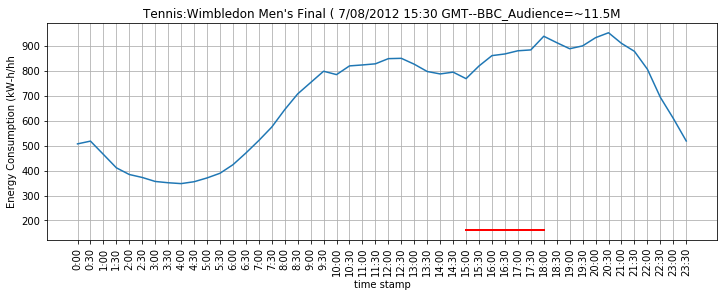

In [36]:
## Plot the day's energy consumption.


plt.figure(figsize=(12,4))
plt.plot(MenTennis_Final["tstamp"],MenTennis_Final["sigma"])
plt.xticks(rotation='vertical')
plt.title("Tennis:Wimbledon Men's Final ( 7/08/2012 15:30 GMT--BBC_Audience=~11.5M")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.plot(['15:00', '18:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.grid()


plt.show()